In [2]:
import pandas as pd

df = pd.read_csv("data_c.csv")

df['label'] = df['label'].str.strip().str.lower()

df.head()

,Time (seconds),time_ms,value,label
0,18.75,17547,0,quiet
1,18.86,17653,0,quiet
2,18.96,17757,0,quiet
3,19.07,17861,0,quiet
4,19.17,17965,0,quiet


In [3]:
X = df[['value']]
y = df['label']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5503448275862068


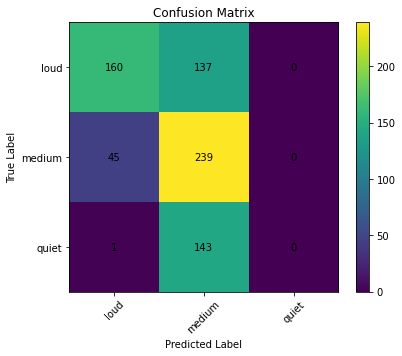

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(model.classes_))
plt.xticks(tick_marks, model.classes_, rotation=45)
plt.yticks(tick_marks, model.classes_)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add numbers inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()